In [ ]:
# !pip install automata-lib
# !pip install colormath
# !pip install visual-automata
# !pip install coloraide
# !apt install libgraphviz-dev
# !pip install pygraphviz
!pip install tock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.5/536.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tock: filename=tock-0.31-py2.py3-none-any.whl size=45197 sha256=dd99c218911b1124b383719ac2708e609e8036073ae9e1ba49b71ff8b47b2209
  Stored in directory: /root/.cache/pip/wheels/a2/85/3a/01ae9c7c21ce4a5b61577ee406108cca5eeebd11715b44738e
Successfully built tock


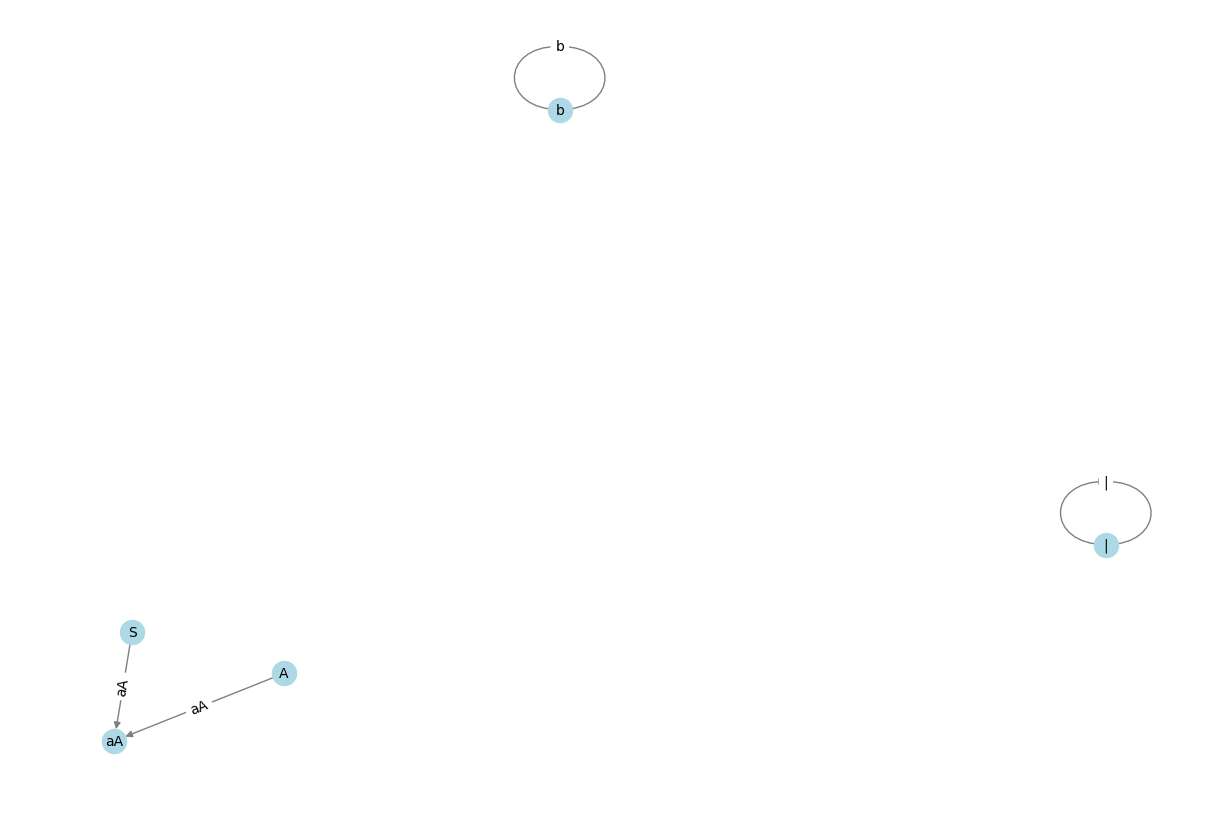

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def convert_to_pushdown_automata(grammar):
    """
    Converts a context-free grammar to a pushdown automaton.

    Args:
        grammar (str): The context-free grammar in string format.

    Returns:
        A directed graph representing the pushdown automaton.
    """
    # Parse the grammar
    rules = grammar.strip().split('\n')
    non_terminals = set()
    terminals = set()
    transitions = defaultdict(list)

    for rule in rules:
        left, right = rule.split(' -> ')
        non_terminals.add(left)
        for symbol in right.split():
            if symbol.isupper():
                non_terminals.add(symbol)
            else:
                terminals.add(symbol)
        transitions[left].append(right.split())

    # Create the pushdown automaton
    G = nx.DiGraph()
    G.add_nodes_from(non_terminals | terminals)

    for state, rules in transitions.items():
        for rule in rules:
            for i in range(len(rule)):
                symbol = rule[i]
                if i == 0:
                    G.add_edge(state, symbol, label=symbol)
                else:
                    G.add_edge(symbol, rule[i], label=rule[i])
    return G

def save_pushdown_automata_as_image(G, filename):
    """Saves the pushdown automaton as an image file.
Args:
        G (networkx.DiGraph): The pushdown automaton represented as a directed graph.
        filename (str): The name of the output image file."""
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['label'] for u, v, d in G.edges(data=True)})
    plt.savefig(filename)

# Example usage
grammar = """
S -> aA
A -> aA | b
"""
G = convert_to_pushdown_automata(grammar)
save_pushdown_automata_as_image(G, 'pushdown_automata.png')

In [ ]:
# RETARDED CODE

from typing import AbstractSet, Dict, Tuple

class NPDA:
    def __init__(self, states: AbstractSet[str], input_symbols: AbstractSet[str], stack_symbols: AbstractSet[str],
                 transitions: Dict[str, Dict[str, Dict[str, Tuple[str, str]]]], initial_state: str, initial_stack_symbol: str,
                 final_states: AbstractSet[str], acceptance_mode: str = "both"):
        self.states = states
        self.input_symbols = input_symbols
        self.stack_symbols = stack_symbols
        self.transitions = transitions
        self.initial_state = initial_state
        self.initial_stack_symbol = initial_stack_symbol
        self.final_states = final_states
        self.acceptance_mode = acceptance_mode

# Function to convert a string of context-free grammar to a NPDA
def convert_grammar_to_npda(grammar: str) -> NPDA:
    # Your conversion logic here to generate the NPDA based on the context-free grammar string
    # This could involve parsing the grammar, constructing the states, input symbols, stack symbols, transitions, etc.
    # Construct and return the NPDA object with the generated information

    # Example NPDA construction
    npda = NPDA(
        states={'q0', 'q1', 'q2'},
        input_symbols={'a', 'b'},
        stack_symbols={'A', 'B', '#'},
        transitions={
            'q0': {
                '': {
                    '#': {('q2', '#')},
                },
                'a': {
                    '#': {('q0', ('A', '#'))},
                    'A': {
                        ('q0', ('A', 'A')),
                        ('q1', ''),
                    },
                    'B': {('q0', ('A', 'B'))},
                },
                'b': {
                    '#': {('q0', ('B', '#'))},
                    'A': {('q0', ('B', 'A'))},
                    'B': {
                        ('q0', ('B', 'B')),
                        ('q1', ''),
                    },
                },
            },
            'q1': {
                '': {'#': {('q2', '#')}},
                'a': {'A': {('q1', '')}},
                'b': {'B': {('q1', '')}},
            },
        },
        initial_state='q0',
        initial_stack_symbol='#',
        final_states={'q2'},
        acceptance_mode='final_state'
    )

    return npda

# Example usage
grammar = """
S -> aA
A -> aA | bB
B -> bB | c
"""

npda = convert_grammar_to_npda(grammar)
print(npda.transitions)
# {'q0': {'': {'#': {('q2', '#')}}, 'a': {'#': {('q0', ('A', '#'))}, 'A': {('q1', ''), ('q0', ('A', 'A'))}, 'B': {('q0', ('A', 'B'))}}, 'b': {'#': {('q0', ('B', '#'))}, 'A': {('q0', ('B', 'A'))}, 'B': {('q1', ''), ('q0', ('B', 'B'))}}}, 'q1': {'': {'#': {('q2', '#')}}, 'a': {'A': {('q1', '')}}, 'b': {'B': {('q1', '')}}}}

{'q0': {'': {'#': {('q2', '#')}}, 'a': {'#': {('q0', ('A', '#'))}, 'A': {('q1', ''), ('q0', ('A', 'A'))}, 'B': {('q0', ('A', 'B'))}}, 'b': {'#': {('q0', ('B', '#'))}, 'A': {('q0', ('B', 'A'))}, 'B': {('q1', ''), ('q0', ('B', 'B'))}}}, 'q1': {'': {'#': {('q2', '#')}}, 'a': {'A': {('q1', '')}}, 'b': {'B': {('q1', '')}}}}


In [ ]:
from typing import AbstractSet, Dict, Set, Tuple

from collections import defaultdict

NPDAStateT = str

NPDATransitionsT = Dict[NPDAStateT, Dict[str, Dict[str, Set[Tuple[NPDAStateT, str]]]]]


def convert_cfg_to_npda(
    cfg: str,
) -> Tuple[
    AbstractSet[NPDAStateT],
    AbstractSet[str],
    AbstractSet[str],
    NPDATransitionsT,
    NPDAStateT,
    str,
    AbstractSet[NPDAStateT],
    str,
]:

    """

    Convert a context-free grammar string into a nondeterministic pushdown automaton.


    Args:

        cfg: A string representing the context-free grammar in the format:

            "S -> aA | bB\nA -> ε | aS\nB -> ε | bS\n"


    Returns:

        A tuple containing the NPDA's:

            - states: A set of valid states

            - input_symbols: A set of valid input symbols

            - stack_symbols: A set of valid stack symbols

            - transitions: A dictionary of transitions for each state

            - initial_state: The initial state

            - initial_stack_symbol: The initial stack symbol

            - final_states: A set of final states

            - acceptance_mode: The acceptance mode ('final_state', 'empty_stack', or 'both')

    """

    # Parse the CFG into a dictionary of productions

    productions = {}

    for line in cfg.splitlines():


        lhs= line.split(" -> ")
        print(f"lhs/n{lhs}")
        rhs = line.split(" -> ")
        print(f"rhs/n{rhs}")
        # lhs = [l.strip() for l in lhs.split("|")]
        # rhs = [r.strip() for r in rhs.split("|")]

        # productions[lhs] = rhs

    # Create the NPDA states, input symbols, and stack symbols

    states = set(productions.keys())

    input_symbols = set(
        symbol for rhs in productions.values() for symbol in rhs if symbol.islower()
    )

    stack_symbols = set(
        symbol for rhs in productions.values() for symbol in rhs if symbol.isupper()
    )

    # Create the NPDA transitions

    transitions = defaultdict(lambda: defaultdict(lambda: defaultdict(set)))

    for lhs, rhs_list in productions.items():

        for rhs in rhs_list:

            if rhs == "ε":

                transitions[lhs]["ε"][lhs].add((lhs, "ε"))

            else:

                symbol, next_state = rhs[0], rhs[1:]

                transitions[lhs][symbol][next_state].add((next_state, symbol))

    # Determine the initial state and initial stack symbol

    initial_state = next(iter(productions))

    initial_stack_symbol = initial_state

    # Determine the final states

    final_states = set(
        state for state in states if any(rhs == "ε" for rhs in productions[state])
    )

    # Set the acceptance mode

    acceptance_mode = "both"

    return (
        states,
        input_symbols,
        stack_symbols,
        transitions,
        initial_state,
        initial_stack_symbol,
        final_states,
        acceptance_mode,
    )

cfg = '''

S -> aA | bB

A -> ε | aS

B -> ε | bS
'''


states, input_symbols, stack_symbols, transitions, initial_state, initial_stack_symbol, final_states, acceptance_mode = convert_cfg_to_npda(cfg)

lhs/n['']
rhs/n['']
lhs/n['']
rhs/n['']
lhs/n['S', 'aA | bB']
rhs/n['S', 'aA | bB']
lhs/n['']
rhs/n['']
lhs/n['A', 'ε | aS']
rhs/n['A', 'ε | aS']
lhs/n['']
rhs/n['']
lhs/n['B', 'ε | bS']
rhs/n['B', 'ε | bS']


StopIteration: 

In [ ]:
from typing import AbstractSet, Mapping, Tuple
from automata.pda.npda import NPDA, NPDAStateT, NPDATransitionsT

def convert_grammar_to_npda(grammar: str) -> NPDATransitionsT:
    """
    Converts a context-free grammar string into a nondeterministic pushdown automaton (NPDA).

    Args:
        grammar (str): The context-free grammar in the format:
            S -> aA | bBC | d
            A -> bC | a
            B -> b
            C -> cC | C

    Returns:
        NPDATransitionsT: The transitions of the NPDA.
    """
    transitions: NPDATransitionsT = {}

    # Parse the grammar rules
    rules = grammar.strip().split('\n')
    for rule in rules:
        lhs, rhs = rule.split(' -> ')
        lhs_symbol = lhs.strip()
        rhs_options = rhs.strip().split(' | ')

        for rhs_option in rhs_options:
            rhs_symbols = rhs_option.strip().split()

            # Add transitions for this rule
            current_state = lhs_symbol
            if current_state not in transitions:
                transitions[current_state] = {}

            for symbol in rhs_symbols:
                next_state = symbol
                if symbol == lhs_symbol:
                    # Pop the current symbol from the stack
                    # transitions[current_state][symbol] = {(next_state, ())}
                    transitions[current_state][symbol] = {(next_state, '')}
                else:
                    # Push the next symbol onto the stack
                    # ('q0', ('A', 'A'))
                    transitions[current_state][symbol] = {(next_state, (next_state, symbol))}
                current_state = next_state

    return transitions

# Example usage
sample_grammar = """
S -> aA | bBC | d
A -> bC | a
B -> b
C -> cC | C
"""

npda_transitions = convert_grammar_to_npda(sample_grammar)

# Create the NPDA
npda = NPDA(
    states=set(npda_transitions.keys()),
    input_symbols=set(symbol for state_transitions in npda_transitions.values() for symbol in state_transitions),
    stack_symbols=set(symbol for state_transitions in npda_transitions.values() for transitions in state_transitions.values() for _, symbol in transitions),
    transitions=npda_transitions,
    initial_state='S',
    initial_stack_symbol='#',
    final_states={'d'},
    acceptance_mode='final_state'
)

# Test the NPDA
print(npda.accepts_input('aabc'))  # True
print(npda.accepts_input('bbcd'))  # True
print(npda.accepts_input('d'))     # True
print(npda.accepts_input('abc'))   # False


InvalidSymbolError: state S has invalid transition stack symbol ('aA', ('aA', 'aA'))

In [ ]:
from automata.pda.npda import NPDA

class NPDA_1:
    def __init__(self, states, alphabet, stack_alphabet, initial_state, initial_stack_symbol, final_states, transitions):
        self.states = states
        self.alphabet = alphabet
        self.stack_alphabet = stack_alphabet
        self.initial_state = initial_state
        self.initial_stack_symbol = initial_stack_symbol
        self.final_states = final_states
        self.transitions = transitions

def parse_grammar(grammar):
    states = set()
    alphabet = set()
    stack_alphabet = set()
    initial_state = None
    initial_stack_symbol = None
    final_states = set()
    transitions = []

    # Extract non-terminals and terminals from the grammar
    non_terminals = set(rule.split(' -> ')[0] for rule in grammar)
    terminals = set(symbol for rule in grammar for symbol in rule.split(' -> ')[1].split() if symbol.islower())

    # Create states and initial state
    states = non_terminals.copy()
    initial_state = next(iter(non_terminals))  # Choose the first non-terminal as the initial state

    # Create stack alphabet
    stack_alphabet = non_terminals.copy()
    initial_stack_symbol = initial_state

    # Create final states
    final_states = non_terminals.copy()

    # Create transitions
    for rule in grammar:
        lhs, rhs = rule.split(' -> ')
        for symbol in rhs.split():
            if symbol.islower():  # Terminal symbol
                transitions.append((lhs, symbol, lhs, symbol))
            else:  # Non-terminal symbol
                transitions.append((lhs, '', symbol, symbol))

    return NPDA_1(states, terminals, stack_alphabet, initial_state, initial_stack_symbol, final_states, transitions)

# Example usage
grammar = [
    'S -> aA | bBC | d',
    'A -> bC | a',
    'B -> b',
    'C -> cC | C'
]

npda2 = parse_grammar(grammar)
print(npda.states)  # {'S', 'A', 'B', 'C'}
print(npda.alphabet)  # {'a', 'b', 'c', 'd'}
print(npda.stack_alphabet)  # {'S', 'A', 'B', 'C'}
print(npda.initial_state)  # 'S'
print(npda.initial_stack_symbol)  # 'S'
print(npda.final_states)  # {'S', 'A', 'B', 'C'}
print(npda.transitions)  # [(S, 'a', S, 'A'), (S, 'b', S, 'B'),...]

npda = NPDA(
            states=npda2.states,
            input_symbols=npda2.alphabet,
            stack_symbols=npda2.stack_alphabet,
            transitions=npda2.transitions,
            initial_state='C',
            initial_stack_symbol='C',
            final_states=npda2.final_states,
            acceptance_mode='final_state')

{'C', 'A', 'S', 'B'}
{'a', 'b', 'd'}
{'C', 'A', 'S', 'B'}
C
C
{'C', 'A', 'S', 'B'}
[('S', '', 'aA', 'aA'), ('S', '', '|', '|'), ('S', '', 'bBC', 'bBC'), ('S', '', '|', '|'), ('S', 'd', 'S', 'd'), ('A', '', 'bC', 'bC'), ('A', '', '|', '|'), ('A', 'a', 'A', 'a'), ('B', 'b', 'B', 'b'), ('C', '', 'cC', 'cC'), ('C', '', '|', '|'), ('C', '', 'C', 'C')]


AttributeError: 'tuple' object has no attribute 'items'

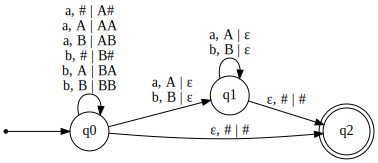

In [ ]:
from automata.pda.npda import NPDA

# Define the grammar
grammar = {
    "S": ["aX"],
    "X": ["aX", "Λ"]
}

# Define the NPDA
new_npda = NPDA(
            states={"q0", "q1", "q2"},
            input_symbols={"a", "b"},
            stack_symbols={"A", "B", "#"},
            transitions={
                "q0": {
                    "": {
                        "#": {("q2", "#")},
                    },
                    "a": {
                        "#": {("q0", ("A", "#"))},
                        "A": {
                            ("q0", ("A", "A")),
                            ("q1", ""),
                        },
                        "B": {("q0", ("A", "B"))},
                    },
                    "b": {
                        "#": {("q0", ("B", "#"))},
                        "A": {("q0", ("B", "A"))},
                        "B": {
                            ("q0", ("B", "B")),
                            ("q1", ""),
                        },
                    },
                },
                "q1": {
                    "": {"#": {("q2", "#")}},
                    "a": {"A": {("q1", "")}},
                    "b": {"B": {("q1", "")}},
                },
            },
            initial_state="q0",
            initial_stack_symbol="#",
            final_states={"q2"},
            acceptance_mode="final_state"
    )

# Check if the NPDA accepts the grammar
new_npda.show_diagram()  # Returns True

In [ ]:
# https://github.com/behzadshomali/Pushdown_automaton/blob/master/PDA.py

import re, pprint

LAMBDA = '\u03BB'

def clean_whitespaces(string): # Preprocess the strings to simplify tokenizing
    spaces = re.compile(r'\s+')
    print(f"CLEAN_wHITESPACES: {re.sub(spaces, '', string)}")
    return re.sub(spaces, '', string)

def grammar_tokenizer():
    tokens = {}
    print('Enter the grammar in the form of Greibach normal form:')
    line = clean_whitespaces(input())
    while line != 'END':
        origin = line[0]
        start = line.find('->')
        destinations = line[start+2: ].split('|')
        tokens[origin] = destinations
        line = clean_whitespaces(input())
    print(f"GRAMMAR_TOKENIZER: {tokens}")
    return tokens

def extract_transitions(tokens):
    transitions = {}
    transitions['q0,%s,z' %(LAMBDA)] = ['q1,%sz' %(list(tokens.keys())[0])] # We manually add state 'q0'
    for token in tokens.items():
        for destination in token[1]:
            destination = clean_whitespaces(destination)
            stack_value = destination[1:] if len(destination) > 1 else LAMBDA
            element = 'q1,%s,%s' %(destination[0:1], token[0])
            transitions.setdefault(element, []).append('q1, %s' %(stack_value))
    transitions['q1,%s,z' %(LAMBDA)] = ['qf,z'] # We manually add state 'qf'
    print(f"EXTRACT_TRANSITIONS: {transitions}")
    return transitions

def states_initializer(transitions):
    q0 = State(name='q0', isStart=True, isFinal=False)
    q1 = State(name='q1', isStart=False, isFinal=False)
    q2 = State(name='qf', isStart=False, isFinal=True)

    for transition in transitions.items():
        if 'q0' in transition[0]:
            q0.output_transitions.append({transition[0]: transition[1]})
        if 'q0' in transition[1]:
            q0.input_transitions.append({transition[0]: transition[1]})
        if 'q1' in transition[0]:
            q1.output_transitions.append({transition[0]: transition[1]})
        if 'q1' in transition[1]:
            q1.input_transitions.append({transition[0]: transition[1]})
        if 'q2' in transition[0]:
            q2.output_transitions.append({transition[0]: transition[1]})
        if 'q2' in transition[1]:
            q2.input_transitions.append({transition[0]: transition[1]})

    print(f"STATES_INITIALIZER: {q0, q1, q2}")
    return q0, q1, q2

class State:
    def __init__(self, name, isStart=False, isFinal=False):
        self.name = name
        self.isFinal = isFinal
        self.input_transitions = []
        self.output_transitions = []


class PDA: #Pushdown automaton
    def __init__(self, states, transitions):
        self.states = states
        self.tokens = tokens
        self.stack = ['z']
        self.state = states[0]

    def check_string(self, string, stack, current_state):
        string_orig = string
        state_orig = current_state
        stack_copy = [x for x in stack]

        for transition in transitions.items():
            for t in transition[1]:
                t = clean_whitespaces(t)
                if current_state.name == transition[0].split(',')[0]:
                    if len(string) == 0 and len(stack) != 1:
                        break
                    if len(string) == 0 and len(stack) == 1:
                        print("ACCEPTED :)")
                        exit(0)

                    if string[0] == transition[0].split(',')[1] or transition[0].split(',')[1] == LAMBDA:
                        if stack[-1] == transition[0].split(',')[2]:
                            for state in self.states:
                                if state.name == t.split(',')[0]:
                                    current_state = state
                                    break
                            if transition[0].split(',')[1] != LAMBDA:
                                string = string[1:]
                            stack.pop()
                            if t.split(',')[1] != LAMBDA:
                                stack += list(t.split(',')[1][::-1])
                            if current_state.isFinal and len(string) == 0:
                                print(transition)
                                print('ACCEPTED :)')
                                exit(0)

                            self.check_string(string, stack, current_state)
                string = string_orig
                stack = [x for x in stack_copy]
                state = state_orig


#===================================================

tokens = grammar_tokenizer()
transitions = extract_transitions(tokens)
states = list(states_initializer(transitions))
pda = PDA(states, transitions)

pprint.pprint(transitions)

input_string = input('Enter the string: ')
while input_string == '': # To check whether the string is empty
    input_string = input('Enter the string: ')

pda.check_string(input_string, pda.stack, pda.state)
print("NOT ACCEPTED :(")

Enter the grammar in the form of Greibach normal form:
S -> 0S1
CLEAN_wHITESPACES: S->0S1
S -> LAMBDA
CLEAN_wHITESPACES: S->LAMBDA
END
CLEAN_wHITESPACES: END
GRAMMAR_TOKENIZER: {'S': ['LAMBDA']}
CLEAN_wHITESPACES: LAMBDA
EXTRACT_TRANSITIONS: {'q0,λ,z': ['q1,Sz'], 'q1,L,S': ['q1, AMBDA'], 'q1,λ,z': ['qf,z']}
STATES_INITIALIZER: (<__main__.State object at 0x77fdb4305d50>, <__main__.State object at 0x77fdb4305fc0>, <__main__.State object at 0x77fdb4305c90>)
{'q0,λ,z': ['q1,Sz'], 'q1,L,S': ['q1, AMBDA'], 'q1,λ,z': ['qf,z']}
Enter the string: AMBDA
CLEAN_wHITESPACES: q1,Sz
CLEAN_wHITESPACES: q1,Sz
CLEAN_wHITESPACES: q1,AMBDA
CLEAN_wHITESPACES: qf,z
CLEAN_wHITESPACES: q1,AMBDA
CLEAN_wHITESPACES: qf,z
CLEAN_wHITESPACES: q1,Sz
CLEAN_wHITESPACES: q1,AMBDA
CLEAN_wHITESPACES: qf,z
NOT ACCEPTED :(


S -> aA | bBC | d
A -> bC | a
B -> b
C -> cC | C

S->aA|bBC|d
A->bC|a
B->b
C->cC|C END

S->aA|bBC|dA->bC|aB->bC->cC|C END

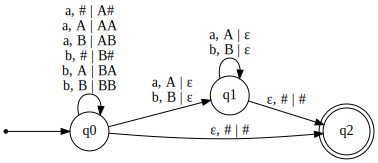

In [ ]:
from automata.pda.npda import NPDA

npda = NPDA(states={'q0', 'q1', 'q2'},
            input_symbols={'a', 'b'},
            stack_symbols={'A', 'B', '#'},
            transitions={
                'q0': {
                    '': {
                        '#': {('q2', '#')},  # no change to stack
                    },
                    'a': {
                        '#': {('q0', ('A', '#'))},  # push 'A' to stack
                        'A': {
                            ('q0', ('A', 'A')),  # push 'A' to stack
                            ('q1', ''),  # pop from stack
                        },
                        'B': {('q0', ('A', 'B'))},  # push 'A' to stack
                    },
                    'b': {
                        '#': {('q0', ('B', '#'))},  # push 'B' to stack
                        'A': {('q0', ('B', 'A'))},  # push 'B' to stack
                        'B': {
                            ('q0', ('B', 'B')),  # push 'B' to stack
                            ('q1', ''),  # pop from stack
                        },
                    },
                },
                'q1': {
                    '': {'#': {('q2', '#')}},  # push '#' to (currently empty) stack
                    'a': {'A': {('q1', '')}},  # pop from stack
                    'b': {'B': {('q1', '')}},  # pop from stack
                },
            },
            initial_state='q0',
            initial_stack_symbol='#',
            final_states={'q2'},
            acceptance_mode='final_state'
            )
# aaabb
# input_str="aabb",
# with_machine=True, with_stack=True
npda.show_diagram()

In [ ]:
from automata.fa.dfa import DFA
from automata.fa.nfa import NFA
from typing import FrozenSet

regex = "(a|b)*"
nfa = NFA.from_regex(regex, input_symbols=frozenset(["a", "b"]))
dfa = DFA.from_nfa(nfa)
# dfa.show_diagram()

npda2 = NPDA.register(dfa)
# aaabb
# input_str="aabb",
# with_machine=True, with_stack=True
npda2.show_diagram()

TypeError: Can only register classes

In [ ]:
"""
'q0,λ,z': ['q1,Sz'],
'q1,C,S': ['q1, λ'],
'q1,a,S': ['q1, A', 'q1, B->bC->cC'],
'q1,b,S': ['q1, BC'],
'q1,d,S': ['q1, A->bC'],
'q1,λ,z': ['qf,z']}

{'q0,λ,z': ['q1,Sz'], 'q1,a,S': ['q1, A', 'q1, B->bC->cC'], 'q1,b,S': ['q1, BC'], 'q1,d,S': ['q1, A->bC'], 'q1,C,S': ['q1, λ'], 'q1,λ,z': ['qf,z']}
{'q0': {'a': {'0': ('q1', ('1', '0'))}}, 'q1': {'a': {'1': ('q1', ('1', '1'))}, 'b': {'1': ('q2', '')} }, 'q2': {'b': {'1': ('q2', '')}, '': {'0': ('q3', ('0',))}}}

'q0,λ,z': ['q1,Sz']
'q0': {'a': {'0': ('q1', ('1', '0'))}}
"""

In [ ]:
!git clone https://github.com/Af4rinz/cfg-to-pda.git

Cloning into 'cfg-to-pda'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 63 (delta 19), reused 55 (delta 15), pack-reused 0
Receiving objects: 100% (63/63), 22.61 KiB | 4.52 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
cfg_to_pda = __import__("cfg-to-pda")
dir(cfg_to_pda.__path__.__dir__)
print(cfg_to_pda.__path__.__dir__)

<built-in method __dir__ of _NamespacePath object at 0x79b9ffe46fe0>


In [ ]:
cfg = """
S → 0S1 | A
A → 1A0 | S | ε
"""

In [ ]:
!cd cfg-to-pda && python cfgToPda.py

Path for grammar: /content/cfg-to-pda/Samples/grammar1-strings.txt
Traceback (most recent call last):
  File "/content/cfg-to-pda/cfgToPda.py", line 92, in <module>
    states, transitions = Grammar.importGrammar(path)
  File "/content/cfg-to-pda/Grammar/grammarImport.py", line 28, in importGrammar
    raise IllegalVariableException(character, rule)
Utils.Exceptions.IllegalVariableException: Illegal character not in states or terminals
3 in 3."baabbba"accept


In [ ]:
# https://github.com/DES-Lab/AALpy
!pip install aalpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
def learning_context_free_grammar_example():
    from aalpy.automata import SevpaAlphabet
    from aalpy.learning_algs import run_KV
    from aalpy.oracles import RandomWordEqOracle
    from aalpy.utils.BenchmarkSULs import get_balanced_string_sul
    from aalpy.utils import save_automaton_to_file, load_automaton_from_file, visualize_automaton

    call_return_map = {'(': ')', '[': ']'}

    sevpa_alphabet = SevpaAlphabet([], list(call_return_map.keys()), list(call_return_map.values()))

    # bounded deterministic approximation
    balanced_string_sul = get_balanced_string_sul(call_return_map, allow_empty_string=False)
    eq_oracle = RandomWordEqOracle(sevpa_alphabet.get_merged_alphabet(), balanced_string_sul, num_walks=1000,
                                   min_walk_len=5, max_walk_len=30)

    learned_deterministic_approximation = run_KV(sevpa_alphabet.get_merged_alphabet(),
                                                 balanced_string_sul, eq_oracle, automaton_type='dfa',
                                                 max_learning_rounds=20)

    balanced_string_sul = get_balanced_string_sul(call_return_map, allow_empty_string=False)
    eq_oracle = RandomWordEqOracle(sevpa_alphabet.get_merged_alphabet(), balanced_string_sul, num_walks=1000,
                                   min_walk_len=5, max_walk_len=30)
    learned_model = run_KV(sevpa_alphabet, balanced_string_sul, eq_oracle, automaton_type='vpa')
    # learned_model.save()
    learned_model.visualize("ass.png")
    visualize_automaton(learned_model, file_type='png')

learning_context_free_grammar_example()

Hypothesis 12: 13 states.
-----------------------------------
Learning Finished.
Learning Rounds:  12
Number of states: 13
Time (in seconds)
  Total                : 0.47
  Learning algorithm   : 0.07
  Conformance checking : 0.4
Learning Algorithm
 # Membership Queries  : 350
 # MQ Saved by Caching : 1595
 # Steps               : 2377
Equivalence Query
 # Membership Queries  : 1490
 # Steps               : 25304
-----------------------------------
Hypothesis 2: 3 states.
-----------------------------------
Learning Finished.
Learning Rounds:  2
Number of states: 2
Time (in seconds)
  Total                : 0.09
  Learning algorithm   : 0.01
  Conformance checking : 0.08
Learning Algorithm
 # Membership Queries  : 65
 # MQ Saved by Caching : 25
 # Steps               : 362
Equivalence Query
 # Membership Queries  : 1026
 # Steps               : 17890
-----------------------------------
Visualization started in the background thread.
Visualization started in the background thread.
Model

{'q0'}


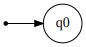

In [ ]:
# https://github.com/JurajVincur/Automata/blob/7403f204d5b550e2a6e6cf33e328af284f8d0825/pdaSim.py
import tkinter as tk
from tkinter import scrolledtext, Label, Frame
import re
from automata.pda.npda import NPDA
from automata.pda.stack import PDAStack
from automata.pda.configuration import PDAConfiguration
from automata.base.exceptions import RejectionException

def norm(txt):
    return re.sub("[^\S\r\n]", "", txt)

def removeNLs(txt):
    return re.sub("[\r\n]", "", txt)

class AsciiTree:

    BLTCORNER = "┌"
    BRTCORNER = "┐"
    BLBCORNER = "└"
    BRBCORNER = "┘"
    BHEDGE = "─"
    BVEDGE = "│"
    BTCONNECTOR = "┴"
    BBCONNECTOR = "┬"
    VEDGE = "│"
    HEDGE = "─"
    SCEDGE = "├"
    SEDGE = "└"
    EEDGE = "┐"
    CEDGE = "┬"

    def __init__(self, boxSize):
        self.content = ""
        self.boxSize = boxSize
        self.boxParts = (self.boxSize[1] >> 1, self.boxSize[1] - 1 - (self.boxSize[1] >> 1))
        self.boxTop = AsciiTree.BLTCORNER + self.boxParts[0] * AsciiTree.BHEDGE + AsciiTree.BTCONNECTOR + self.boxParts[1] * AsciiTree.BHEDGE + AsciiTree.BRTCORNER
        self.boxBottom = AsciiTree.BLBCORNER + self.boxParts[0] * AsciiTree.BHEDGE + AsciiTree.BBCONNECTOR + self.boxParts[1] * AsciiTree.BHEDGE + AsciiTree.BRBCORNER
        self.boxWidth = len(self.boxTop)
        self.lastLevel = ((0, 0), )
        return

    def createEdges(self, edgeGroups):
        content = ""
        if len(edgeGroups) == 0:
            return content
        lines = []
        for i, (pcol, toCols)in enumerate(edgeGroups):
            edgeLength = (toCols[-1] - pcol) * self.boxWidth
            edge = ""
            toColsCheck = set(((toCol - pcol) * self.boxWidth for toCol in toCols))
            if edgeLength == 0:
                edge = AsciiTree.VEDGE
            else:
                edge = "".join((AsciiTree.CEDGE if ichar in toColsCheck else char for ichar, char in enumerate(edgeLength * AsciiTree.HEDGE)))
                edge = (AsciiTree.SCEDGE if pcol == toCols[0] else AsciiTree.SEDGE) + edge[1:] + AsciiTree.EEDGE
            prefix = (pcol * self.boxWidth + self.boxParts[0] + 1) * " "
            line = prefix + edge
            lines.append(line)
        #norm
        maxLength = max((len(line) for line in lines))
        lines = [line + (maxLength - len(line)) * " " for line in lines]
        #scan from bottom to top
        for i in range(1, len(lines)):
            prevLine = lines[i-1]
            line = lines[i]
            toFinish = set([AsciiTree.SCEDGE, AsciiTree.SEDGE, AsciiTree.VEDGE])
            lines[i] = "".join([AsciiTree.VEDGE if char == " " and prevLine[ichar] in toFinish else char for ichar, char in enumerate(line)])
        lines.reverse()
        #scan again from top to bottom
        for i in range(1, len(lines)):
            prevLine = lines[i-1]
            line = lines[i]
            toFinish = set([AsciiTree.SCEDGE, AsciiTree.EEDGE, AsciiTree.VEDGE, AsciiTree.CEDGE])
            lines[i] = "".join([AsciiTree.VEDGE if char == " " and prevLine[ichar] in toFinish else char for ichar, char in enumerate(line)])
        return "\n".join(lines)

    def addLevel(self, items):
        topLine = ""
        midLines = [""] * self.boxSize[0]
        bottomLine = ""
        nextCol = 0
        level = []
        edgeGroups = []
        for parent, pcol in self.lastLevel:
            toCols = []
            if parent not in items:
                continue
            for i, (child, data) in enumerate(items[parent]):
                col = max(pcol + i, nextCol)
                level.append((child, col))
                toCols.append(col)
                df = col - nextCol
                nextCol = col + 1
                topLine += " " * df * self.boxWidth + self.boxTop
                for j in range(self.boxSize[0]):
                    lineData = data[j][:self.boxSize[1]]
                    lineData = lineData + (self.boxSize[1] - len(lineData)) * " "
                    midLines[j] += " " * df * self.boxWidth + AsciiTree.BVEDGE + lineData + AsciiTree.BVEDGE
                bottomLine += " " * df * self.boxWidth + self.boxBottom
            if len(toCols) > 0:
                edgeGroups.append((pcol, toCols))
        content = self.createEdges(edgeGroups) + "\n" + topLine + "\n" + "\n".join(midLines) + "\n" + bottomLine + "\n"
        self.content += content
        self.lastLevel = tuple(level)
        return content

class MyNPDA(NPDA):

    def read_input_stepwise(self, input_str):
        """
        Check if the given string is accepted by this NPDA.
        Yield the NPDA's current configurations at each step.
        """
        current_configurations = set()
        initial_configuration = PDAConfiguration(
            self.initial_state,
            input_str,
            PDAStack([self.initial_stack_symbol])
        )
        initial_configuration.cid = 0
        initial_configuration.pcid = 0
        current_configurations.add(initial_configuration)

        yield current_configurations

        cid = 1
        while current_configurations:
            new_configurations = set()
            for config in current_configurations:
                if self._has_accepted(config):
                    # One accepting configuration is enough.
                    return
                next_configurations = set()
                if config.remaining_input or self._has_lambda_transition(config.state, config.stack.top()):
                    next_configurations = self._get_next_configurations(config)
                for next_conf in next_configurations:
                    next_conf.cid = cid
                    cid += 1
                    next_conf.pcid = config.cid
                new_configurations.update(
                    next_configurations
                )
            current_configurations = new_configurations
            yield current_configurations

        raise RejectionException(
            'the NPDA did not reach an accepting configuration'
        )

class Automaton:

    def __init__(self, parser):
        self.parser = parser
        self.npda = None
        self.steps = None
        self.asciiTree = AsciiTree((3,20))
        self.canStep = True
        return

    def stop(self, text_area_C=None):
        self.npda = None
        self.steps = None
        if text_area_C is not None:
            text_area_C.delete('1.0', 'end')
        self.canStep = True
        self.asciiTree = AsciiTree((3,20))
        return

    def initialize(self, txtAreaT, txtAreaF, txtAreaI):
        txtTrans = txtAreaT.get("1.0", "end")
        txtF = txtAreaF.get("1.0", "end")
        txtI = txtAreaI.get("1.0", "end")
        definition = self.parser.parse(txtTrans, txtF)
        print(definition)
        self.npda = MyNPDA(**definition)
        self.steps = self.npda.read_input_stepwise(removeNLs(txtI))
        return

    def step(self, txtAreaT, txtAreaF, txtAreaI, text_area_C):
        if(self.canStep == False):
            return
        if self.steps is None:
            self.initialize(txtAreaT, txtAreaF, txtAreaI)
        try:
            confs = next(self.steps)
            items = {}
            for conf in confs:
                if conf.pcid not in items:
                    items[conf.pcid] = []
                items[conf.pcid].append((conf.cid, ("S:" + conf.state, "V:" + conf.remaining_input, "Z:" + "".join(conf.stack))))
            if len(items) > 0:
                treePart = self.asciiTree.addLevel(items)
                #text_area_C.delete('1.0', 'end')
                text_area_C.insert(tk.END, treePart)
            print(confs)
        except StopIteration:
            print("ACCEPTED!!!")
            text_area_C.insert(tk.END, ("\n" + "─"*11 + "\n"*2) + "ACCEPTED!!!")
            self.canStep = False
        except RejectionException:
            print("REJECTED!!!")
            text_area_C.insert(tk.END, ("\n" + "─"*11 + "\n"*2) + "REJECTED!!!")
            self.canStep = False
        text_area_C.see(tk.END)
        return

class Parser:

    def __init__(self):
        return

    def parse(self, txtTrans, txtF):
        transitions = {}
        states = set()
        inputSymbols = set()
        stackSymbols = set()

        normedTrans = re.sub("[^\S\r\n]", "", txtTrans)

        matches = re.finditer("d\(([a-z]\d*),(.?),([A-Z]\d*)\)=\(([a-z]\d*),(([A-Z]\d*)*)\)", normedTrans)
        for match in matches:

            state = match.group(1)
            inputSymbol = match.group(2)
            stackTop = match.group(3)
            newState = match.group(4)
            pushToStack = tuple(re.findall("[A-Z]\d*", match.group(5)))

            states.add(state)
            inputSymbols.add(inputSymbol)
            stackSymbols.add(stackTop)
            stackSymbols.update(pushToStack)

            if state not in transitions:
                transitions[state] = {}
            if inputSymbol not in transitions[state]:
                transitions[state][inputSymbol] = {}
            if stackTop not in transitions[state][inputSymbol]:
                transitions[state][inputSymbol][stackTop] = set()
            transitions[state][inputSymbol][stackTop].add((newState, pushToStack))

        inputSymbols.discard('')
        stackSymbols.add('Z0')
        states.add('q0')

        normedF = re.sub("[^\S\r\n]", "", txtF)
        match = re.match("\{(([a-z]\d*)(,[a-z]\d*)*)\}", normedF) # FINAL STATE
        finalStates = set(match.group(1).split(',')) if match is not None else set()

        states.add('q0')
        states.update(finalStates)

        definition = {
            'states':states,
            'input_symbols':inputSymbols,
            'stack_symbols':stackSymbols,
            'transitions':transitions,
            'initial_state':'q0',
            'initial_stack_symbol':'Z0',
            'final_states':finalStates,
            'acceptance_mode':'final_state'
        }
        print(definition)
        return definition

if __name__=="__main__":
    """
    asciiTree = AsciiTree((3,20))
    asciiTree.addLevel({0:((0,("S:q0","V:a","Z:A")),)})
    asciiTree.addLevel({0:((1, ("S:q0","V:a","Z:A")),(2, ("S:q0","V:a","Z:A")),(3, ("S:q0","V:a","Z:A")))})
    print(asciiTree.content)
    import sys
    sys.exit(0)
    """

    # Creating tkinter main window
    # win = tk.Tk()
    # win.title("PDA Sim")

    parser = Parser()
    automaton = Automaton(parser)

    """
    font = ("Consolas", 12)

    label = Label(text = "Definícia", anchor="w", font=font)
    label.grid(row=0, column=0, sticky="w", padx=10, pady=(10,0))
    text_area = scrolledtext.ScrolledText(
        win,
        wrap = tk.WORD,
        width = 40,
        height = 9,
        font = font
    )
    text_area.grid(row = 1, column = 0, padx = 10)
    text_area.insert(tk.INSERT, "\n".join((
        "M = (K, S, T, d, q0, Z0, F)\n",
        "K je konečná množina stavov",
        "S je vstupná abeceda",
        "T je zásobníková abeceda",
        "d je prechodová funkcia",
        "q0 je počiatočný stav",
        "Z0 je počiatočný zásobníkový symbol",
        "F je množina koncových stavov"
    )))
    text_area.config(state=tk.DISABLED)

    label = Label(text = "F", anchor="w", font=font)
    label.grid(row=2, column=0, sticky="w", padx=10, pady=(10,0))
    text_area_F = scrolledtext.ScrolledText(
        win,
        wrap = tk.WORD,
        width = 40,
        height = 1,
        font = font
    )
    text_area_F.grid(row = 3, column = 0, padx = 10)
    text_area_F.insert(tk.INSERT, "{f1, f2}")

    label = Label(text = "Prechodové funkcie", anchor="w", font=font)
    label.grid(row=4, column=0, sticky="w", padx=10, pady=(10,0))
    text_area_T = scrolledtext.ScrolledText(
        win,
        wrap = tk.WORD,
        width = 40,
        height = 10,
        font = font
    )
    text_area_T.grid(row = 5, column = 0, pady = (0,10), padx = 10)

    label = Label(text = "Priebeh", anchor="w", font=font)
    label.grid(row=0, column=1, sticky="w", padx=10, pady=(10,0))

    cframe = Frame(win)
    vbar = tk.Scrollbar(cframe)
    vbar.pack (side = tk.RIGHT, fill = "y")
    hbar = tk.Scrollbar(cframe, orient = tk.HORIZONTAL)
    hbar.pack (side = tk.BOTTOM, fill = "x")
    text_area_C = tk.Text(
        cframe,
        width = 110,
        yscrollcommand = vbar.set,
        xscrollcommand = hbar.set,
        wrap = "none",
        font = ("Consolas", 8)
    )
    text_area_C.pack(expand = 1, fill = tk.BOTH)
    hbar.config(command = text_area_C.xview)
    vbar.config(command = text_area_C.yview)
    cframe.grid(row = 1, column = 1, rowspan=7, pady = (0,10), padx = 10, sticky="ns")

    label = Label(text = "Vstup", anchor="w", font=font)
    label.grid(row=6, column=0, sticky="w", padx=10)
    text_area_I = scrolledtext.ScrolledText(
        win,
        wrap = tk.WORD,
        height = 2,
        width = 40,
        font = font
    )
    text_area_I.grid(row = 7, column = 0, pady = (0,10), padx = 10)

    bframe = Frame(win)
    bframe.grid(row=8, column=0, columnspan=2, sticky="nsew")

    button1=tk.Button(bframe, text="Stop", command=lambda: automaton.stop(text_area_C))
    button1.grid(row = 0, column = 0, pady = (0,10), padx = (10,0))

    button1=tk.Button(bframe, text="Krok", command=lambda: automaton.step(text_area_T, text_area_F, text_area_I, text_area_C))
    button1.grid(row = 0, column = 1, pady = (0,10))

    # Placing cursor in the text area
    text_area_T.focus()
    win.resizable(False, False)
    win.mainloop()
    """

def parse(txtTrans, txtF):
    transitions = {}
    states = set()
    inputSymbols = set()
    stackSymbols = set()

    normedTrans = re.sub("[^\S\r\n]", "", txtTrans)

    matches = re.finditer("d\(([a-z]\d*),(.?),([A-Z]\d*)\)=\(([a-z]\d*),(([A-Z]\d*)*)\)", normedTrans)
    for match in matches:

        state = match.group(1)
        inputSymbol = match.group(2)
        stackTop = match.group(3)
        newState = match.group(4)
        pushToStack = tuple(re.findall("[A-Z]\d*", match.group(5)))

        states.add(state)
        inputSymbols.add(inputSymbol)
        stackSymbols.add(stackTop)
        stackSymbols.update(pushToStack)

        if state not in transitions:
            transitions[state] = {}
        if inputSymbol not in transitions[state]:
            transitions[state][inputSymbol] = {}
        if stackTop not in transitions[state][inputSymbol]:
            transitions[state][inputSymbol][stackTop] = set()
        transitions[state][inputSymbol][stackTop].add((newState, pushToStack))

    inputSymbols.discard('')
    stackSymbols.add('#')
    states.add('q0')

    normedF = re.sub("[^\S\r\n]", "", txtF)
    match = re.match("\{(([a-z]\d*)(,[a-z]\d*)*)\}", normedF) # FINAL STATE
    finalStates = set(match.group(1).split(',')) if match is not None else set()

    states.add('q0')
    states.update(finalStates)

    definition = {
        'states':states,
        'input_symbols':inputSymbols,
        'stack_symbols':stackSymbols,
        'transitions':transitions,
        'initial_state':'q0',
        'initial_stack_symbol':'#',
        'final_states':finalStates,
        'acceptance_mode':'final_state'
    }
    print(definition["states"])
    return definition
ass = parse("S -> aX X -> aX | Λ", "q0")
npda = NPDA(**ass)
npda.show_diagram()
# print("hello")

In [ ]:
# https://coli-saar.github.io/cl20/notebooks/CFGs.html

import nltk
from nltk.grammar import Nonterminal
''' groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
groucho_grammar '''
cfg1 = nltk.CFG.fromstring("""
S -> aX
X -> aX |
""")
sigma = ["aX"]
cfg1.productions()
parser = nltk.ChartParser(cfg1)

''' cfg1.productions(lhs=Nonterminal("A"))
cfg1.productions(rhs=Nonterminal("aA")) '''
trees = list(parser.parse(sigma))
print(cfg1)

ValueError: Grammar does not cover some of the input words: "'aX'".

In [ ]:
import graphviz

# Define the grammar rules
rules = {
    'S': ['aA', 'b'],
    'A': ['a', 'b']
}

# Create the Graphviz graph
g = graphviz.Digraph()
for lhs, rhs_list in rules.items():
    for rhs in rhs_list:
        g.edge(lhs, rhs)

# Render the graph
g.render('context_free_grammar')

'context_free_grammar.pdf'

In [ ]:
from typing import AbstractSet, Mapping
from automata.pda.pda import PDA, PDAStateT, PDAAcceptanceModeT

class NPDA(PDA):
    def __init__(self,
                 states: AbstractSet[PDAStateT],
                 input_symbols: AbstractSet[str],
                 stack_symbols: AbstractSet[str],
                 transitions: Mapping[PDAStateT, Mapping[str, Mapping[str, set]]],
                 initial_state: PDAStateT,
                 initial_stack_symbol: str,
                 final_states: AbstractSet[PDAStateT],
                 acceptance_mode: PDAAcceptanceModeT = 'both'):
        super().__init__(states, input_symbols, stack_symbols, transitions, initial_state, initial_stack_symbol, final_states, acceptance_mode)

def parse_npda(grammar: str) -> NPDA:
    """
    Parse a string of context-free grammar into a nondeterministic pushdown automaton (NPDA)
    """
    # Split the grammar into productions
    productions = grammar.splitlines()

    # Initialize the NPDA components
    states = set()
    input_symbols = set()
    stack_symbols = set()
    transitions = {}
    initial_state = None
    initial_stack_symbol = None
    final_states = set()

    # Iterate over the productions
    for production in productions:
        # Split the production into left-hand side and right-hand side
        try:
            lhs, rhs = production.split('->')

            # Extract the state and input symbol from the left-hand side
            state, input_symbol = lhs.split(',')
            state = state.strip()
            input_symbol = input_symbol.strip()

            # Add the state and input symbol to the NPDA components
            states.add(state)
            input_symbols.add(input_symbol)

            # Extract the stack symbols and transition from the right-hand side
            rhs_parts = rhs.split(',')
            stack_symbols.update(part.strip() for part in rhs_parts[1:])
            transition = (rhs_parts[0].strip(), tuple(part.strip() for part in rhs_parts[1:]))

            # Add the transition to the NPDA components
            if state not in transitions:
                transitions[state] = {}
            if input_symbol not in transitions[state]:
                transitions[state][input_symbol] = {}
            transitions[state][input_symbol][transition[1]] = {transition[0]}

            # Set the initial state and initial stack symbol
            if initial_state is None:
                initial_state = state
                initial_stack_symbol = rhs_parts[1].strip()

            # Set the final states
            if rhs_parts[0].strip() == 'qf':
                final_states.add(state)
        except:
            print("MiNzRNuDP6H7pgOOeDKbg5eAs8hJ15Ek")

    # Create the NPDA
    npda = NPDA(states, input_symbols, stack_symbols, transitions, initial_state, initial_stack_symbol, final_states)

    return npda

# Sample run
grammar = """
q0,a->q0,A#
q0,a->q1,A
q0,b->q0,B#
q0,b->q1,B
q1,a->q1,A
q1,b->q1,B
q1,->q2,#
q2,->qf,#
"""

npda = parse_npda(grammar)
print(npda.states)  # {'q0', 'q1', 'q2', 'qf'}
print(npda.input_symbols)  # {'a', 'b'}
print(npda.stack_symbols)  # {'A', 'B', '#'}
print(npda.transitions)  #...
print(npda.initial_state)  # 'q0'
print(npda.initial_stack_symbol)  # '#'
print(npda.final_states)  # {'qf'}
print(npda.acceptance_mode)  # 'both'

MiNzRNuDP6H7pgOOeDKbg5eAs8hJ15Ek


TypeError: Can't instantiate abstract class NPDA with abstract methods _get_input_path, _validate_transition_invalid_symbols, iter_transitions, read_input_stepwise

In [ ]:
# https://colab.research.google.com/github/ND-CSE-30151/spring-2024/blob/master/notes/13-cfg-to-pda.ipynb
# https://github.com/ND-CSE-30151/tock/blob/89f630c938f3aa31930089bfe08f648281270b8b/docs/html/tutorial/CFGs.ipynb

from tock.grammars import Grammar, from_grammar
from tock.runs import run, run_pda, run_bfs
from tock.graphs import write_dot, from_graph, to_graph
from tock.tables import to_table

# https://github.com/ND-CSE-30151/tock/blob/89f630c938f3aa31930089bfe08f648281270b8b/tock/grammars.py#L51
''' g = Grammar.from_lines([
    "S -> a T b",
    "S -> b",
    "T -> T a",
    "T -> &"
]) '''
# spaces are important

# use split("\n") to parse, and do this first

# find a way how to handle |
# general idea is to make a new string with lhs same as the older one idk
# 1. make string into list
# 2. replace any instance of | to that of the lhs
# 3. join the list back
g = Grammar.from_lines([
    "S ->  a X",
    "X -> a X",
    "X -> &",
])
g

In [ ]:
# visualizing the pda, i don't care if it deviates too much
# https://github.com/ND-CSE-30151/tock/blob/89f630c938f3aa31930089bfe08f648281270b8b/tock/machines.py
p1 = from_grammar(g)
#

# write_dot(run_pda(p1, "a a a", trace=True, show_stack=5), "test.dot")
# write_dot(p1, "test.dot")
''' import pydot
(graph,) = pydot.graph_from_dot_file('test.dot')
graph.write_png('test.png') '''
# https://stackoverflow.com/questions/5316206/converting-dot-to-png-in-python
O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59 = run_pda(p1, "a a a", trace=True, show_stack=5)
if O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59:
    print("True")
else:
    print("False")

trigger: None => start,[a] a a,ε
add: None => loop,[a] a a,[S] $
trigger: None => loop,[a] a a,[S] $
add: None => loop,[a] a a,[a] X $
trigger: None => loop,[a] a a,[a] X $
add: None => loop,[a] a,[X] $
trigger: None => loop,[a] a,[X] $
add: None => loop,[a] a,[a] X $
add: None => loop,[a] a,$
trigger: None => loop,[a] a,[a] X $
add: None => loop,a,[X] $
trigger: None => loop,[a] a,$
add: None => accept,[a] a,ε
trigger: None => loop,a,[X] $
add: None => loop,a,[a] X $
add: None => loop,a,$
trigger: None => accept,[a] a,ε
trigger: None => loop,a,[a] X $
add: None => loop,ε,[X] $
trigger: None => loop,a,$
add: None => accept,a,ε
trigger: None => loop,ε,[X] $
add: None => loop,ε,[a] X $
add: None => loop,ε,$
trigger: None => accept,a,ε
trigger: None => loop,ε,[a] X $
trigger: None => loop,ε,$
add: None => accept,ε,ε
trigger: None => accept,ε,ε
True


In [ ]:
# there should be a space for every terminal and non-terminal
# library thinks they're different things, so i did this
# https://stackoverflow.com/questions/10631473/str-object-does-not-support-item-assignment

string1 = "S -> aXb"
string2 = string1[:4]

for char in string1[4:]:
    string2 += f"{char} "

string2 = string2.strip()
string2_list = list(string2)
string2_list[4] = "" # remove the extra space
string2 = "".join(string2_list)

print(string2.strip())

S -> a X b


In [ ]:
# split the string
sample_cfg = """
S -> aTb|b
T -> Ta
T -> &
"""
sample_cfg = """
S -> SS | BS | SB | USU | Λ
B -> aa | bb
U -> ab | ba
"""
O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59 = ""

for line in sample_cfg.split("\n"):
    O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59 += f"{line.strip()}\n"
sample_cfg = O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59
print(sample_cfg)

def format_cfg(cfg):
    cfg_split = cfg.strip().replace("Λ", "&").split("\n")
    cfg_split_new = []

    for statement in cfg_split:
        temp_statement = statement[:4]

        for char in statement[4:]:
            temp_statement += f"{char} "

        temp_statement = temp_statement.strip()
        temp_statement_list = list(temp_statement)

        temp_statement_list[4] = "" # remove the extra space
        statement = "".join(temp_statement_list).replace("  ", " ").replace("  ", " ")
        statement_union = statement.replace("|", f"\n{statement[0]} -> ").split("\n")

        for statement in statement_union:
            cfg_split_new.append(statement)
            print(F"APPEND: {statement}")
        cfg_split_new.append(statement)
        print(F"APPEND: {statement}")
    # sorted(your_list, lambda x: int(x.split()[-1]))
    O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59 = sorted(list(set(cfg_split_new)), key=lambda x: x.split()[0])
    print(O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59)
    return O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59

# print(sample_cfg_split)
# print(sample_cfg_split_new)
g1 = Grammar.from_lines(format_cfg(sample_cfg))
for line in format_cfg(sample_cfg):
    print(line)
# p2 = from_grammar(g1)
# print(format_cfg(sample_cfg))
# g1.terminals
# S aSbb | abb
g1 = Grammar.from_lines([
    "S -> a S b b",
    "S -> a b b",
])
p2 = from_grammar(g1)

# O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59 = run_pda(p1, "a a b b b b", trace=True, show_stack=5)
''' if O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59.has_path():
    print("True")
else:
    print("False") '''
# print(f"{g1.terminals}\n{g1.nonterminals}\n{g1}")


S -> SS | BS | SB | USU | Λ
B -> aa | bb
U -> ab | ba


APPEND: S -> S S 
APPEND: S ->  B S 
APPEND: S ->  S B 
APPEND: S ->  U S U 
APPEND: S ->  &
APPEND: S ->  &
APPEND: B -> a a 
APPEND: B ->  b b
APPEND: B ->  b b
APPEND: U -> a b 
APPEND: U ->  b a
APPEND: U ->  b a
['B -> a a ', 'B ->  b b', 'S ->  U S U ', 'S ->  &', 'S ->  S B ', 'S -> S S ', 'S ->  B S ', 'U ->  b a', 'U -> a b ']
APPEND: S -> S S 
APPEND: S ->  B S 
APPEND: S ->  S B 
APPEND: S ->  U S U 
APPEND: S ->  &
APPEND: S ->  &
APPEND: B -> a a 
APPEND: B ->  b b
APPEND: B ->  b b
APPEND: U -> a b 
APPEND: U ->  b a
APPEND: U ->  b a
['B -> a a ', 'B ->  b b', 'S ->  U S U ', 'S ->  &', 'S ->  S B ', 'S -> S S ', 'S ->  B S ', 'U ->  b a', 'U -> a b ']
B -> a a 
B ->  b b
S ->  U S U 
S ->  &
S ->  S B 
S -> S S 
S ->  B S 
U ->  b a
U -> a b 


' if O3Pb2zg7J4wQBpCsVgxE5JwxtNVXjs59.has_path():\n    print("True")\nelse:\n    print("False") '

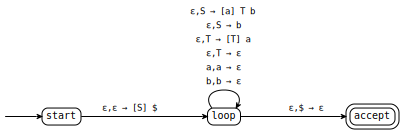

In [ ]:
list_cfg = Grammar.from_lines(["S -> a T b",
                        "S -> b",
                        "T -> T a",
                        "T -> &"])

list_pda = from_grammar(list_cfg)
to_graph(list_pda)

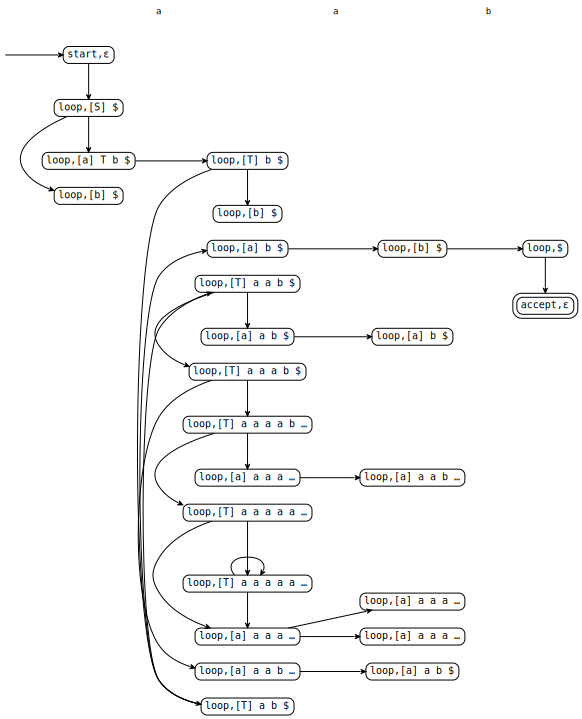

In [ ]:
run(list_pda, "a a b", show_stack=5)

APPEND: S -> a T b
APPEND: S -> a T b
APPEND: S -> b
APPEND: S -> b
APPEND: T -> T a
APPEND: T -> T a
APPEND: T -> &
APPEND: T -> &
['S -> a T b', 'S -> b', 'T -> &', 'T -> T a']


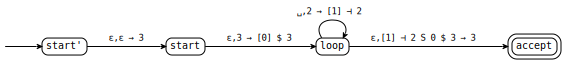

In [ ]:
string_test1 ="""
S -> aTb
S -> b
T -> Ta
T -> &
"""
string_cfgtest1 = Grammar.from_lines(format_cfg(string_test1))
string_pda = from_grammar(string_cfgtest1, mode="lr1")
to_graph(string_pda)

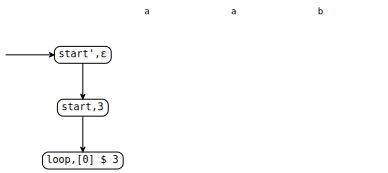

In [ ]:
run(string_pda, "a a b", show_stack=5)

In [ ]:
"""
S -> aTb | b
T -> Ta | Λ
"""